# DATA PREPROCESSING PIPELINE


##Reading the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Importing Dataset
df=pd.read_csv('./FidelFolio_Dataset.csv')

In [3]:
df.head()

,Year,Company,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,...,Feature22,Feature23,Feature24,Feature25,Feature26,Feature27,Feature28,Target 1,Target 2,Target 3
0,1999,Hind. Unilever,15.0,65.87,54.57,41.12,45.82,123.34,0.65,33131.93,...,19.581982,1192.76,1222.04,1120.99,1091.71,1956.94,264.31,5.38,29.08,42.37
1,1999,ITC,66.0,35.77,32.29,37.91,36.37,-269.26,0.57,23632.98,...,10.904040,1040.32,1249.28,1146.99,938.03,3486.42,1252.22,-67.4,-23.41,-33.87
2,1999,Wipro,79.0,31.40,46.55,164.42,74.72,348.29,1.61,18438.55,...,44.860469,182.67,218.26,153.73,118.14,828.14,281.07,538.95,60.23,108.3
3,1999,O N G C,37.0,13.78,11.82,6.12,3.23,6.02,1.19,16868.75,...,0.695653,4269.99,5100.39,4404.90,3574.50,32398.94,8150.14,-29.06,4.07,124.85
4,1999,Lila Worldwide,NaN,0.16,0.14,"5,715.31",-4.41,NaN,"-1,094.90",14916.95,...,4.154480,4.59,4.77,3.09,2.91,3590.57,NaN,150.06,598.24,"1,057.39"


In [4]:
#Shape of Dataset
df.shape

(24751, 33)

In [5]:
#Count of non-null values and Data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24751 entries, 0 to 24750
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Year        24751 non-null  int64  
 1   Company     24751 non-null  object 
 2   Feature1    20914 non-null  float64
 3   Feature2    21999 non-null  float64
 4   Feature3    22770 non-null  float64
 5   Feature4    24204 non-null  object 
 6   Feature5    24148 non-null  object 
 7   Feature6    24050 non-null  object 
 8   Feature7    24274 non-null  object 
 9   Feature8    24751 non-null  float64
 10  Feature9    23514 non-null  object 
 11  Feature10   24025 non-null  float64
 12  Feature11   24207 non-null  float64
 13  Feature12   24292 non-null  float64
 14  Feature13   24729 non-null  float64
 15  Feature14   24716 non-null  float64
 16  Feature15   24198 non-null  float64
 17  Feature16   24625 non-null  float64
 18  Feature17   24702 non-null  float64
 19  Feature18   24625 non-nul

As there is no column having missing values percentage >30%, no need to remove the column

In [6]:
#Checks if there is any duplicate data
print("Number of Duplicate Rows : " ,df.duplicated().sum())

Number of Duplicate Rows :  0


There are no duplicate values

In [7]:
#Converting object data types into numeric data types
for col in df.select_dtypes(include='object').columns:
  if(col!='Company'):
    df[col]=pd.to_numeric(df[col], errors='coerce')

##Handling Missing Data

In [8]:
#Count of null values of each
df.isnull().sum()

,0
Year,0
Company,0
Feature1,3837
Feature2,2752
Feature3,1981
Feature4,914
Feature5,849
Feature6,1151
Feature7,488
Feature8,0


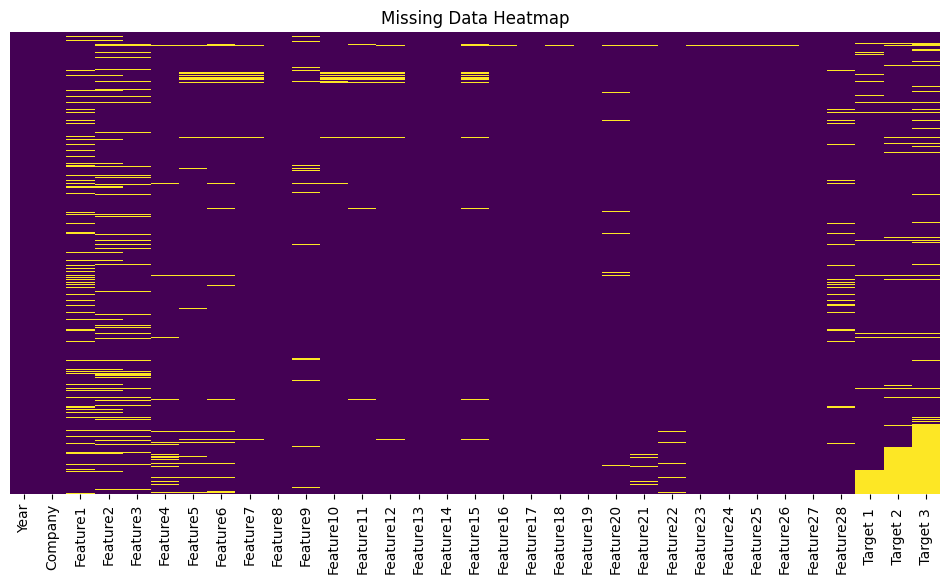

Rows with at least one missing value: 11128 / 24751


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Heatmap to visualize missing data pattern
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title("Missing Data Heatmap")
plt.show()

# Also check how many rows have at least one missing value
rows_with_missing = df.isnull().any(axis=1).sum()
print(f"Rows with at least one missing value: {rows_with_missing} / {len(df)}")



In [10]:
#Percentage of null values in each column
df.isnull().sum()/df.shape[0]*100

,0
Year,0.000000
Company,0.000000
Feature1,15.502404
Feature2,11.118743
Feature3,8.003717
Feature4,3.692780
Feature5,3.430164
Feature6,4.650317
Feature7,1.971638
Feature8,0.000000


In [11]:
#Inserting appropriate values in place of null values
from sklearn.impute import KNNImputer
impute=KNNImputer()
for i in df.select_dtypes(include='number').columns:
  df[i]=impute.fit_transform(df[[i]])

In [12]:
#Checking null values
df.isnull().sum()

,0
Year,0
Company,0
Feature1,0
Feature2,0
Feature3,0
Feature4,0
Feature5,0
Feature6,0
Feature7,0
Feature8,0


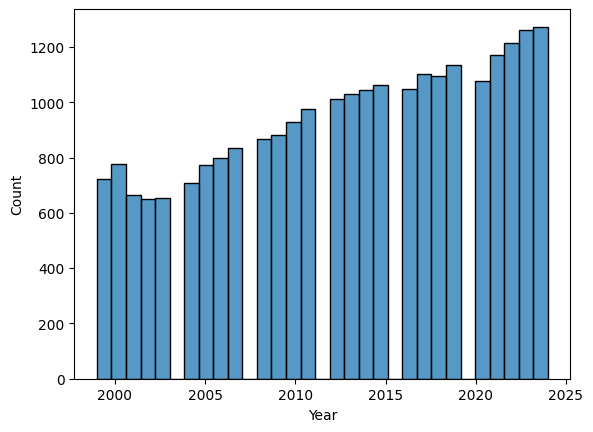

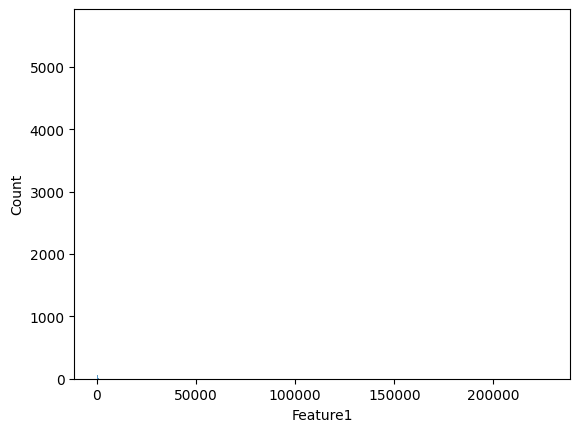

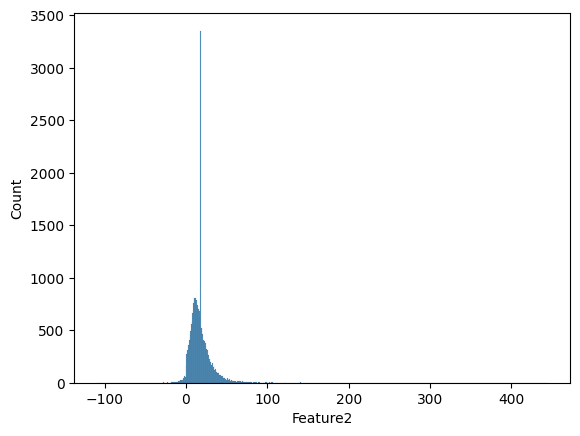

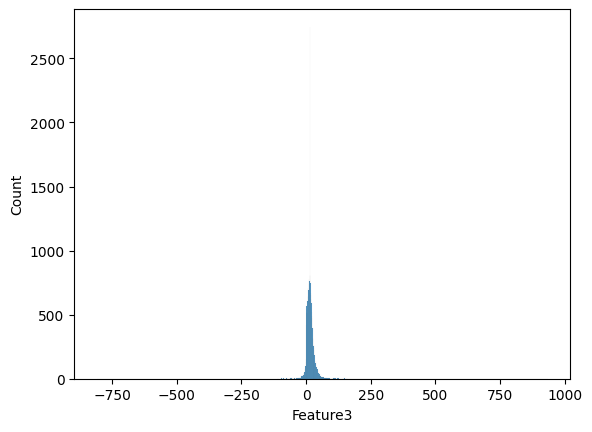

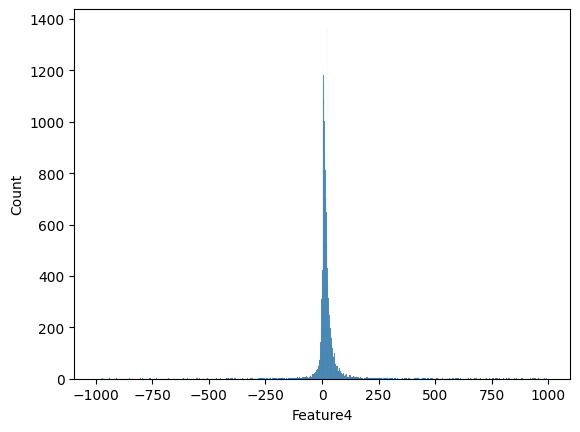

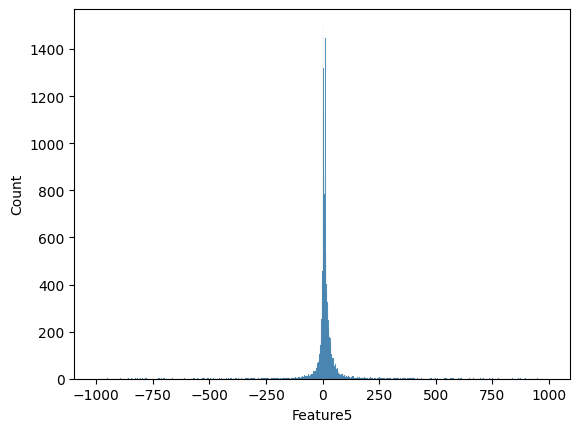

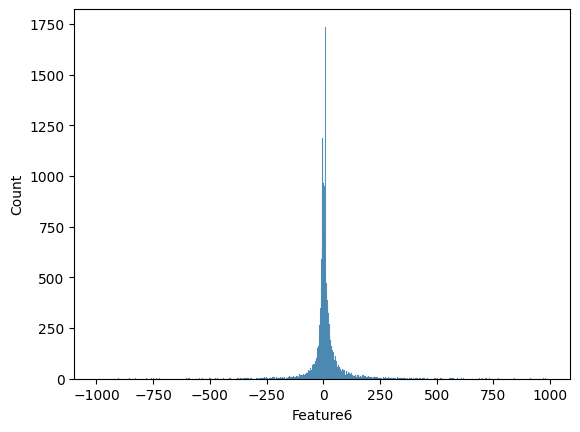

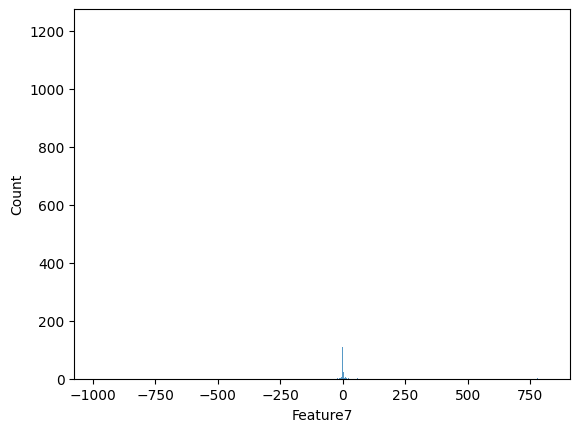

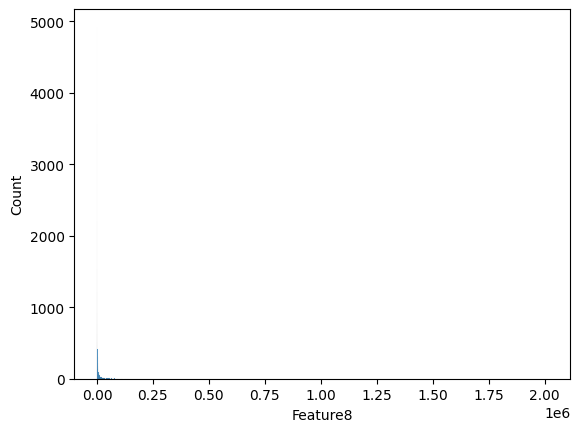

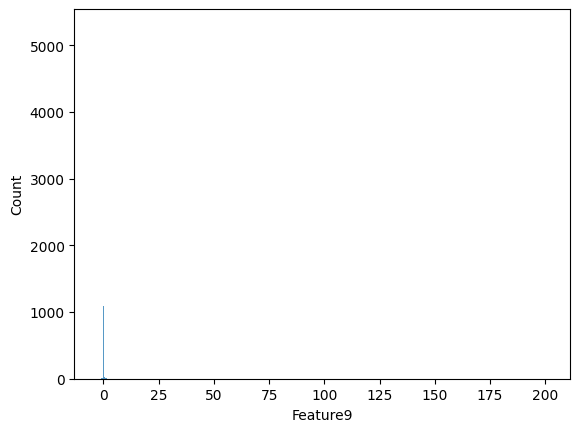

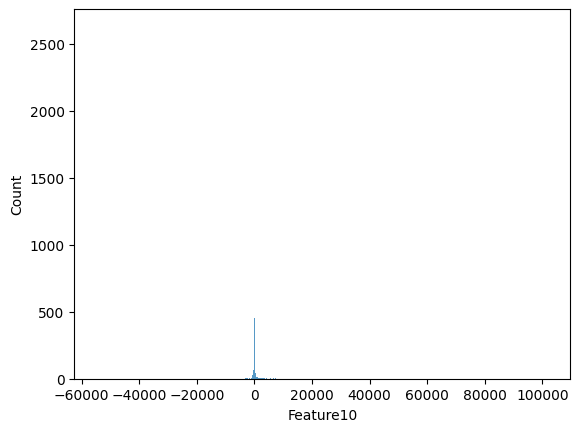

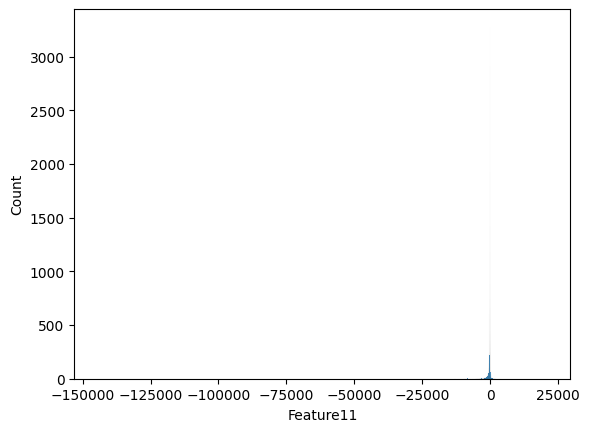

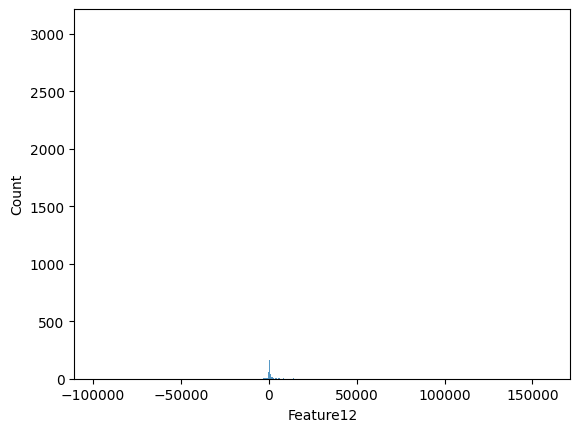

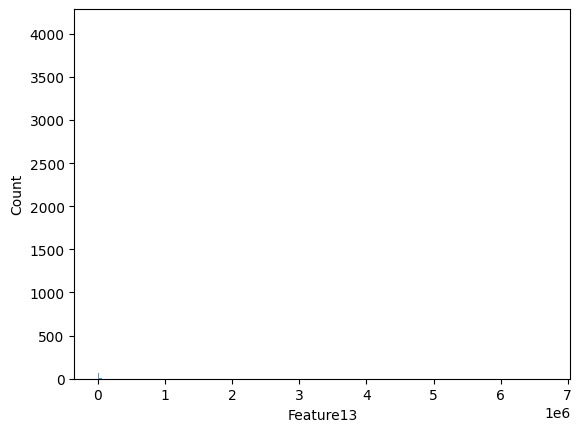

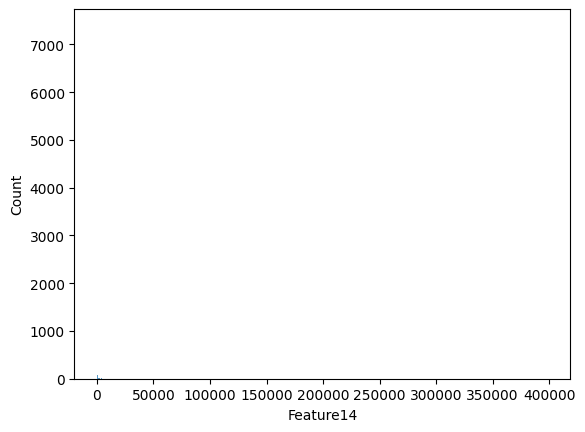

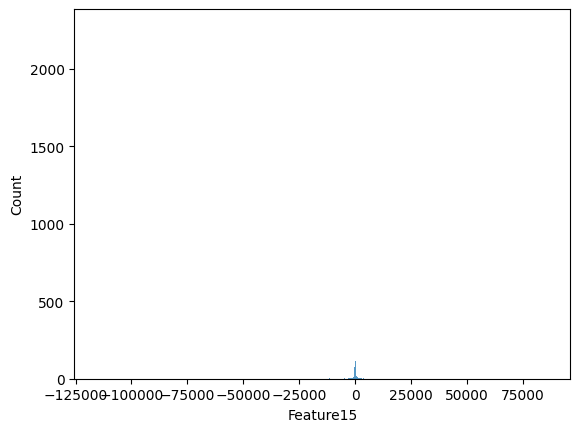

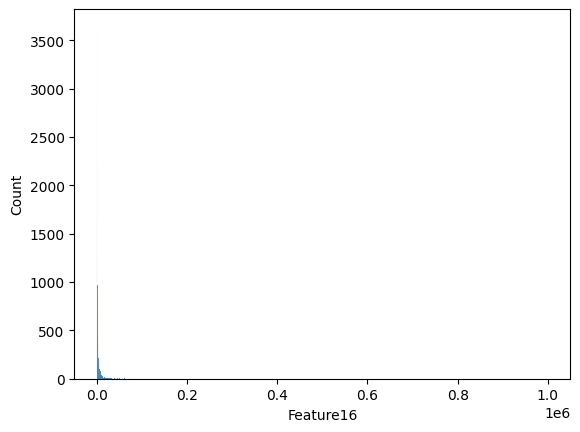

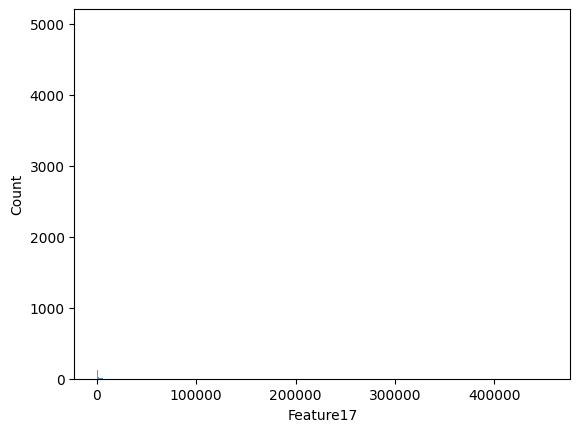

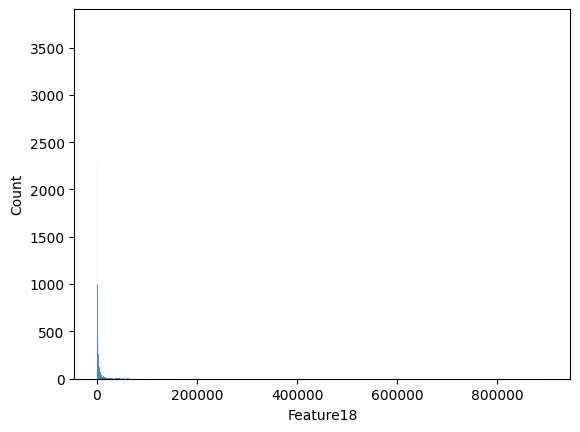

In [ ]:
for i in df.select_dtypes(include='number').columns:
    sns.histplot(data=df,x=i)
    plt.show()

In [ ]:
plt.figure(figsize=(50,50))
sns.heatmap(s,annot=True)

In [ ]:
#Function to find lower bound and upper bound using Inter Quartile Range(IQR)
def wisker(col):
  q1,q3=np.percentile(col,[25,75])
  iqr=q3-q1
  lower_bound=q1-(1.5*iqr)
  upper_bound=q3+(1.5*iqr)
  return lower_bound,upper_bound

In [ ]:
#Winsorizarion to remove outliers
for i in df.select_dtypes(include='number').columns:
  lower_bound,upper_bound=wisker(df[i])
  df[i]=np.where(df[i]>upper_bound,upper_bound,df[i])
  df[i]=np.where(df[i]<lower_bound,lower_bound,df[i])

In [ ]:
#Plotting box plots to check whether there are still any outliers
for i in df.select_dtypes(include='number').columns:
    sns.boxplot(data=df,x=i)
    plt.show()

##Normalization

In [ ]:
df.describe()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
cols=df.select_dtypes(include='number').columns
scaler=MinMaxScaler(feature_range=(0,1))

In [ ]:
df[cols]=scaler.fit_transform(df[cols])

In [ ]:
df.describe()

# Saving File

In [ ]:
df.to_csv("preprocessed_data.csv", index=False)